# Isolation Forests

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/entertainment_clean.csv')
df.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [3]:
# Data Prep
X = df.iloc[:,1:]
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [4]:
X.shape

(150, 3)

In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
model = IsolationForest(contamination=0.02)

In [7]:
model.fit(X)

IsolationForest(contamination=0.02)

In [8]:
df['anomaly_scores'] = model.decision_function(X)
df.sort_values('anomaly_scores').head()

,name,books,tv_shows,video_games,anomaly_scores
110,Octavia,5.0,5.7,7.9,-0.012855
37,Elena,0.8,3.4,4.5,-0.005803
15,Avery,1.0,6.6,5.7,-0.003966
29,Clementine,6.2,5.4,7.2,0.000081
147,Zara,5.5,5.7,7.7,0.002140


In [9]:
df['anomaly'] = model.predict(X)
df.sort_values('anomaly_scores').head(10) 

,name,books,tv_shows,video_games,anomaly_scores,anomaly
110,Octavia,5.0,5.7,7.9,-0.012855,-1
37,Elena,0.8,3.4,4.5,-0.005803,-1
15,Avery,1.0,6.6,5.7,-0.003966,-1
29,Clementine,6.2,5.4,7.2,0.000081,1
147,Zara,5.5,5.7,7.7,0.002140,1
19,Bianca,5.8,3.9,7.7,0.012914,1
148,Zoe,0.0,6.1,5.2,0.023327,1
42,Elizabeth,0.0,4.5,4.3,0.029393,1
58,Hailey,2.5,3.0,5.0,0.040729,1
126,Seraphina,4.2,3.8,4.9,0.058921,1


## Visualizing Anomalies

In [10]:
import seaborn as sns

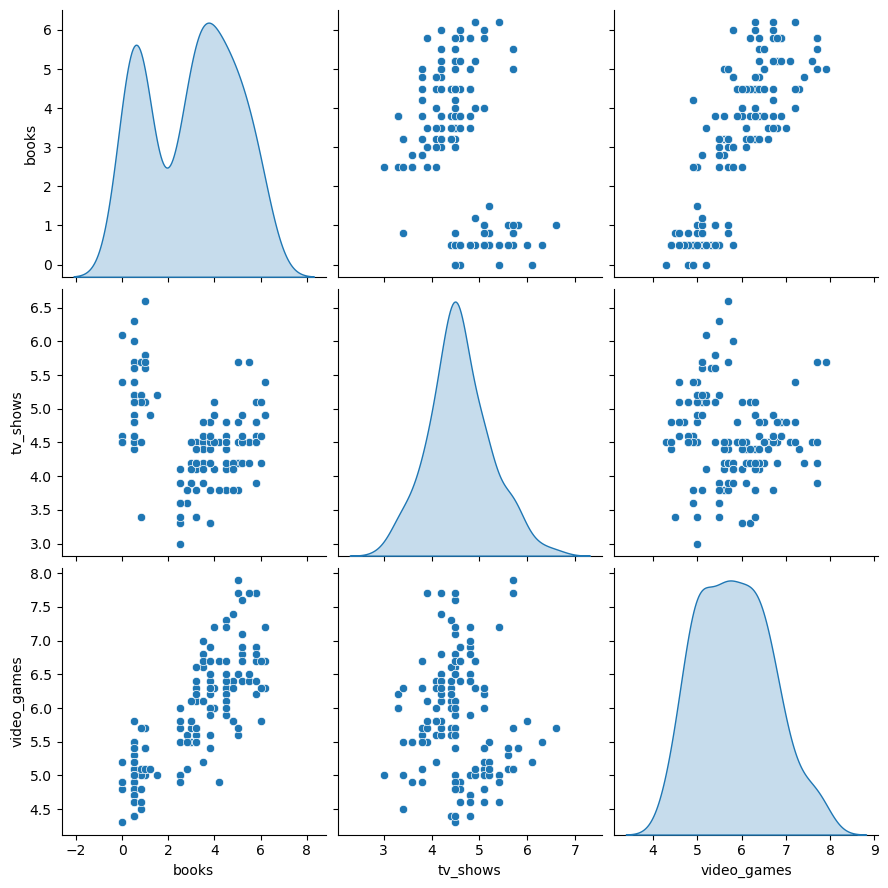

In [11]:
sns.pairplot(X, diag_kind='kde', height=3);

In [12]:
X.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [13]:
df.head()

,name,books,tv_shows,video_games,anomaly_scores,anomaly
0,Aaliyah,0.5,4.6,4.9,0.207827,1
1,Abigail,0.0,4.5,4.8,0.124101,1
2,Addison,0.5,4.5,5.0,0.195404,1
3,Adeline,3.5,4.5,6.6,0.183706,1
4,Alana,2.8,3.8,5.6,0.166904,1


In [14]:
df.iloc[:,1:].drop(columns=['anomaly_scores'])

,books,tv_shows,video_games,anomaly
0,0.5,4.6,4.9,1
1,0.0,4.5,4.8,1
2,0.5,4.5,5.0,1
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,1
...,...,...,...,...
145,5.2,4.6,6.9,1
146,6.0,4.6,6.7,1
147,5.5,5.7,7.7,1
148,0.0,6.1,5.2,1


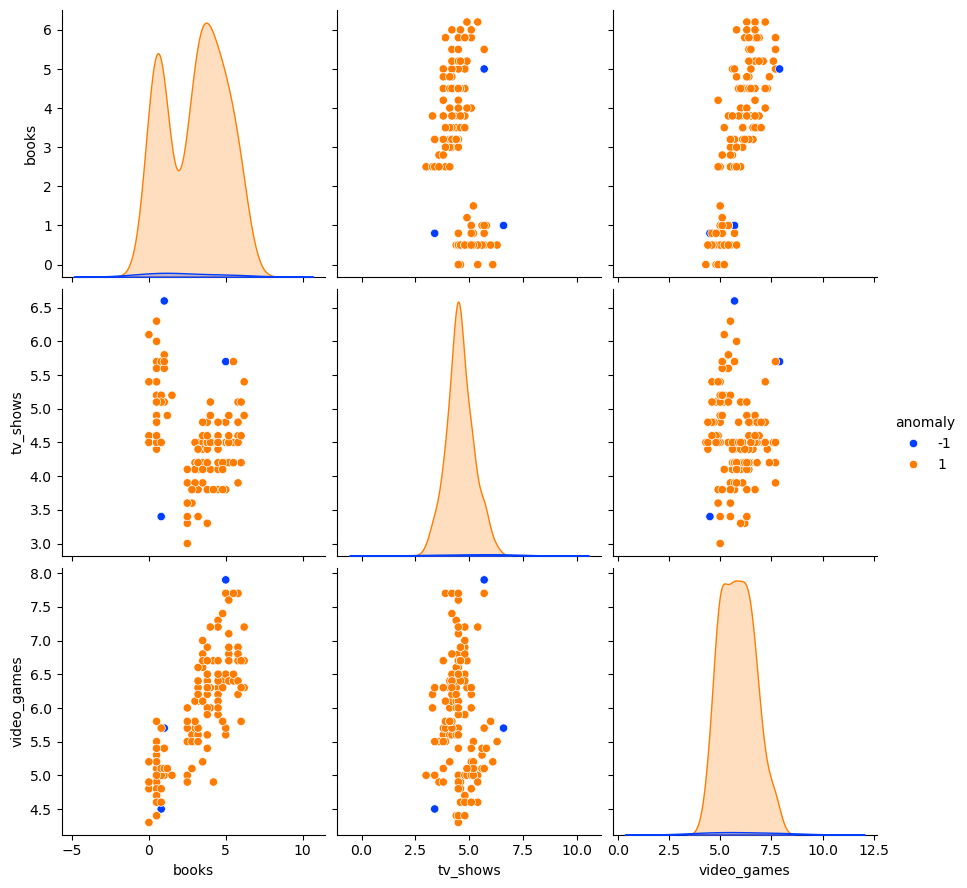

In [15]:
sns.pairplot(df.iloc[:,1:].drop(columns=['anomaly_scores']), 
             hue='anomaly', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);

## Tuning and Interpreting Isolation Forests

In [16]:
model5 = IsolationForest(contamination=0.05)

In [17]:
model5.fit(X)

IsolationForest(contamination=0.05)

In [20]:
df['anomaly_scores5'] = model5.decision_function(X)
df.sort_values('anomaly_scores5').head(10)

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5
110,Octavia,5.0,5.7,7.9,-0.012855,-1,-0.049540,-1
37,Elena,0.8,3.4,4.5,-0.005803,-1,-0.027658,-1
15,Avery,1.0,6.6,5.7,-0.003966,-1,-0.015896,-1
147,Zara,5.5,5.7,7.7,0.002140,1,-0.015113,-1
42,Elizabeth,0.0,4.5,4.3,0.029393,1,-0.013186,-1
19,Bianca,5.8,3.9,7.7,0.012914,1,-0.007399,-1
29,Clementine,6.2,5.4,7.2,0.000081,1,-0.006096,-1
148,Zoe,0.0,6.1,5.2,0.023327,1,-0.000189,-1
58,Hailey,2.5,3.0,5.0,0.040729,1,0.000231,1
109,Nora,0.5,6.3,5.5,0.064931,1,0.031686,1


In [21]:
df['anomaly5'] = model5.predict(X)
df.sort_values('anomaly_scores5').head(10) 

,name,books,tv_shows,video_games,anomaly_scores,anomaly,anomaly_scores5,anomaly5
110,Octavia,5.0,5.7,7.9,-0.012855,-1,-0.049540,-1
37,Elena,0.8,3.4,4.5,-0.005803,-1,-0.027658,-1
15,Avery,1.0,6.6,5.7,-0.003966,-1,-0.015896,-1
147,Zara,5.5,5.7,7.7,0.002140,1,-0.015113,-1
42,Elizabeth,0.0,4.5,4.3,0.029393,1,-0.013186,-1
19,Bianca,5.8,3.9,7.7,0.012914,1,-0.007399,-1
29,Clementine,6.2,5.4,7.2,0.000081,1,-0.006096,-1
148,Zoe,0.0,6.1,5.2,0.023327,1,-0.000189,-1
58,Hailey,2.5,3.0,5.0,0.040729,1,0.000231,1
109,Nora,0.5,6.3,5.5,0.064931,1,0.031686,1


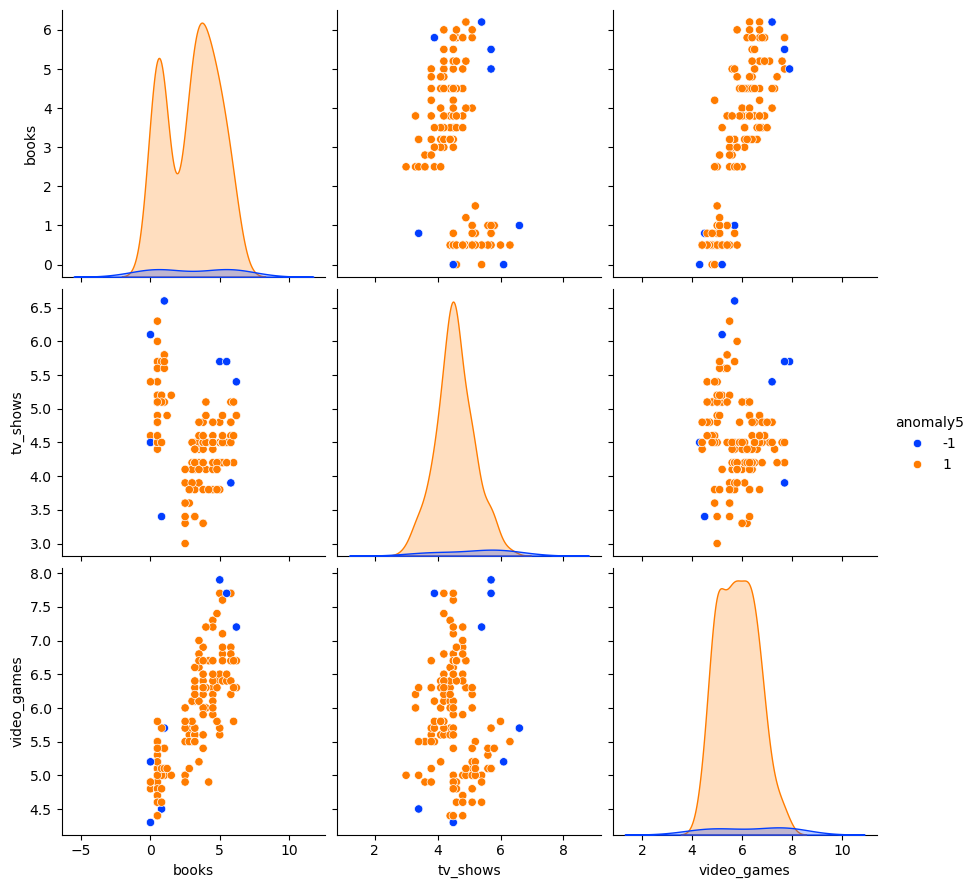

In [25]:
sns.pairplot(df.iloc[:,1:].drop(columns=['anomaly_scores', 'anomaly', 'anomaly_scores5']), 
             hue='anomaly5', # Color depends on anomaly column
             palette='bright',# Default colors are horrible so we set the colors
             diag_kind='kde', 
             height=3);